# Handin Exercise 6

Create a module containing a class with the following methods:
1. __init__(self, url_list)
2. download(url,filename) raises NotFoundException when url returns 404
3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
4. __iter__() returns an iterator
5. __next__() returns the next filename (and stops when there are no more)
6. urllist_generator() returns a generator to loop through the urls
7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

In [16]:
import requests
import uuid
from concurrent.futures import ThreadPoolExecutor, as_completed

class MyClass:
    def __init__(self, url_list):
        self.url_list = url_list
        self.filenames = []
        self.count = 0
        
    def download(self, url, filename):
        r = requests.get(url)
        if r.status_code == "404":
            raise NotFoundException("Given URL not found")
        else:
            f = open(filename, "a")
            f.write(r.json()["value"])
            
    def download_books(self, url, filename):
        r = requests.get(url)
        if r.status_code == "404":
            raise NotFoundException("Given URL not found")
        else:
            f = open(filename, "a")
            f.write(r.text)
            self.filenames.append(filename)


    def multi_download(self):
        threads = []
        with ThreadPoolExecutor(max_workers=20) as executor:
            for url in self.url_list:
                filename = str(uuid.uuid1())
                self.filenames.append(filename)
                threads.append(executor.submit(self.download(url, str(filename))))
                
    def __iter__ (self):
        return self
    
    def __next__(self):
        if len(self.filenames) == 0:
            raise StopIteration
        return self.filenames.pop()

In [17]:
randomUrls = ["https://api.chucknorris.io/jokes/random", "https://api.chucknorris.io/jokes/random", "https://api.chucknorris.io/jokes/random", "https://api.chucknorris.io/jokes/random"]

mc = MyClass(randomUrls)

In [3]:
print(next(mc))

d6d51a9e-857d-11eb-8d99-0242ac130003


In [4]:
def url_generator(self):
    while len(self.url_list) != 0:
        yield self.url_list.pop()
        
[x for x in url_generator(mc)]

['https://api.chucknorris.io/jokes/random',
 'https://api.chucknorris.io/jokes/random',
 'https://api.chucknorris.io/jokes/random',
 'https://api.chucknorris.io/jokes/random']

In [5]:
import csv

def avg_vowels(csv):
    count = 0
    text = ""
    with open(csv, "r") as file:
        lines = file.readlines()
        for line in lines:
            text = line.split(" ")
            all_vowels = 'aeiouyæøå'
            for word in text:
                for char in word:
                    if char in all_vowels:
                        count += 1
    return count/len(text)

print(avg_vowels("./5e6ce8d6-84e0-11eb-ade7-0242ac130003"))

0.9


In [6]:
import time
import multiprocessing
from concurrent.futures import ProcessPoolExecutor

def hardest_read(self, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers):
        scores = {}
        highest_score = 0
        for filename in self.filenames:
            scores[avg_vowels(filename)] = filename

        key_max = max(scores, key=scores.get)
        return scores[key_max]

hardest_read(mc)

'd6b6fc1c-857d-11eb-8d99-0242ac130003'

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

In [18]:
mc.download_books("https://www.gutenberg.org/files/84/84-0.txt", "Frankenstein")
mc.download_books("https://www.gutenberg.org/files/11/11-0.txt", "Alice in Wonderlands")
mc.download_books("https://www.gutenberg.org/files/64812/64812-0.txt", "Eyes that Watch")
mc.download_books("https://www.gutenberg.org/files/1661/1661-0.txt", "The Adventures of Sherlock Holmes")
mc.download_books("https://www.gutenberg.org/files/98/98-0.txt", "A Tale of Two Cities")
mc.download_books("https://www.gutenberg.org/files/1080/1080-0.txt", "A Modest Proposal")
mc.download_books("https://www.gutenberg.org/files/219/219-0.txt", "Heart of Darkness")
mc.download_books("https://www.gutenberg.org/cache/epub/5200/pg5200.txt", "Metamorphisis")
mc.download_books("https://www.gutenberg.org/files/174/174-0.txt", "The Picture of Dorian Gray")
mc.download_books("https://www.gutenberg.org/files/205/205-0.txt", "Walden, and On The Duty Of Civil Disobedience")

[136721.0, 48247.0, 1539.6, 174620.0, 234481.0, 11927.0, 69508.0, 4205.0, 137147.0, 199612.0]
['Frankenstein', 'Alice in Wonderlands', 'Eyes that Watch', 'The Adventures of Sherlock Holmes', 'A Tale of Two Cities', 'A Modest Proposal', 'Heart of Darkness', 'Metamorphisis', 'The Picture of Dorian Gray', 'Walden, and On The Duty Of Civil Disobedience']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

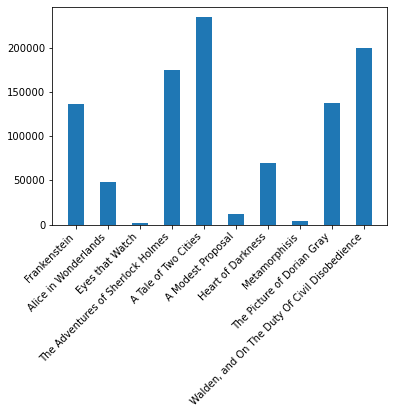

In [28]:
import matplotlib.pyplot as plt

all_vowels_books = []

for x in mc.filenames:
    all_vowels_books.append(avg_vowels(x))
    
print(all_vowels_books)
print(mc.filenames)
plt.bar(mc.filenames, all_vowels_books,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')